<Figure size 432x432 with 0 Axes>

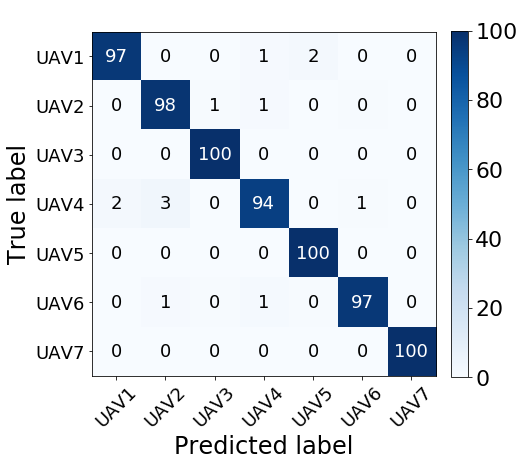

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

"""This script plots a sample confusion matrix for the UAV classification problem"""

# replace this path with the path of preds.pkl file that was generated at the end of test phase by the DLFramework
preds_path = '/home/nasim/Downloads/neu_m046p309d/results/preds.pkl'


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    im = plt.imshow(cm, interpolation='nearest', cmap=cmap)
    maximum = np.amax(cm)
    for x in xrange(cm.shape[0]):
        for y in xrange(cm.shape[1]):
            if cm[x][y]>0.49:
                ax.annotate(str('{0:.{1}f}'.format(100*cm[x][y], 0)), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',fontsize=18,color='w')
            else:
                ax.annotate(str('{0:.{1}f}'.format(100*cm[x][y], 0)), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',fontsize=18,color='k')
    
    plt.title(title,fontsize=24)
    bar_label = ['0','20','40','60','80','100']
    cbar = plt.colorbar(im,fraction=0.046, pad=0.04)
    cbar.ax.set_yticklabels(bar_label)
    cbar.ax.tick_params(labelsize=22) 
    #plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45, fontsize=18)
    plt.yticks(tick_marks, labels, fontsize=18)
    plt.tight_layout()
    plt.ylabel('True label',fontsize=24)
    plt.xlabel('Predicted label',fontsize=24)
    plt.show()

classes = ['uav1','uav2','uav3','uav4','uav5','uav6','uav7']

with open (preds_path,'rb') as handle:
    preds_file = pickle.load(handle)
    

ex_pred = preds_file['preds_ex']

conf = np.zeros([len(classes),len(classes)])
normalized_conf = np.zeros([len(classes),len(classes)])

for key in ex_pred:
    true_label = key.split('/')[-1].split('_')[0]
    true_index = classes.index(true_label)
    predicted_index = np.argmax(ex_pred[key])
    conf[true_index,predicted_index] += 1
    
    
# now conf is ready
for i in range(len(classes)):
    normalized_conf[i,:] = 1.0*conf[i,:] / np.sum(conf[i,:])

labels = []
for i in range(7):
    labels.append('UAV'+str(i+1))

plt.figure(figsize=(6,6))
plot_confusion_matrix(normalized_conf, title=" ", labels=labels)